In [1]:
# Cell 1: import libraries for math, tables, and plotting
import numpy as np            # numerical calculations
import pandas as pd           # tabular data handling
import matplotlib.pyplot as plt  # basic plotting


In [2]:
# Cell 2: define Kim (2001) quadratic ephemeris for Algol
# T0  = reference minimum (JD)
# P0  = mean orbital period (days)
# a   = quadratic term representing long-term period change
T0 = 2445177.4062
P0 = 2.867315
a  = 1.40e-9

def T_calc(E):
    """Return predicted JD of primary minimum for cycle number E.
    Uses the quadratic ephemeris T(E) = T0 + P0*E + a*E^2.
    """
    return T0 + P0*E + a*E**2


In [3]:
# Cell 3: convert Aug 31 (Julian calendar) of a BCE year to a Julian Date (JD)
# We use astronomical year numbering: 1 BCE = year 0, 2 BCE = -1, etc.
# Function assumes dates in the proleptic Julian calendar (no Gregorian reform).
def julian_to_jd(year_bce, month, day):
    """Convert a BCE year, month, day (Julian calendar) to JD.
    year_bce is a positive integer (e.g., 1244 for 1244 BCE).
    """
    Y = -year_bce + 1  # convert BCE to astronomical year
    if month <= 2:
        Y -= 1
        month += 12
    A = 0  # no Gregorian correction for pure Julian calendar
    B = 0
    JD = int(365.25 * (Y + 4716)) + int(30.6001 * (month + 1)) + day + B - 1524.5
    return JD

# Define the sample years (BCE) we want to test on Aug 31
years_bce = [1244, 1235, 1226, 1217, 1208, 1199, 1190, 1181, 1172, 1163]

# Build a table with each BCE year and its corresponding JD for Aug 31
dates = [(y, julian_to_jd(y, 8, 31)) for y in years_bce]
df = pd.DataFrame({
    'Date (Aug 31, BCE)': [d[0] for d in dates],
    'JD': [d[1] for d in dates]
})
df


,"Date (Aug 31, BCE)",JD
0,1244,1267294.5
1,1235,1270581.5
2,1226,1273868.5
3,1217,1277156.5
4,1208,1280443.5
5,1199,1283730.5
6,1190,1287017.5
7,1181,1290305.5
8,1172,1293592.5
9,1163,1296879.5


In [4]:
# Cell 4: compute Algol cycle number, phase, and qualitative day type
def phase_from_jd(jd):
    """Given a Julian Date, return (E_real, phase).
    E_real is the real-valued cycle number.
    phase is the fractional part in [0, 1), where 0 ≈ primary minimum.
    """
    E_real = (jd - T0) / P0
    phase = E_real - np.floor(E_real)
    return E_real, phase

phases = []
types = []

# Loop over each JD to compute phase and classify brightness
for jd in df['JD']:
    E_real, ph = phase_from_jd(jd)
    phases.append(ph)
    # Classification rule:
    #  - phase < 0.1 or > 0.9  → near eclipse (dim) → "Bad"
    #  - 0.25 ≤ phase ≤ 0.75   → bright part of cycle → "Good"
    #  - otherwise             → intermediate brightness
    if ph < 0.1 or ph > 0.9:
        t = 'Bad (near eclipse)'
    elif 0.25 <= ph <= 0.75:
        t = 'Good (bright)'
    else:
        t = 'Intermediate'
    types.append(t)

df['Phase'] = np.round(phases, 2)
df['Day type'] = types
df


,"Date (Aug 31, BCE)",JD,Phase,Day type
0,1244,1267294.5,0.52,Good (bright)
1,1235,1270581.5,0.89,Intermediate
2,1226,1273868.5,0.26,Good (bright)
3,1217,1277156.5,0.98,Bad (near eclipse)
4,1208,1280443.5,0.34,Good (bright)
5,1199,1283730.5,0.71,Good (bright)
6,1190,1287017.5,0.08,Bad (near eclipse)
7,1181,1290305.5,0.80,Intermediate
8,1172,1293592.5,0.17,Intermediate
9,1163,1296879.5,0.54,Good (bright)


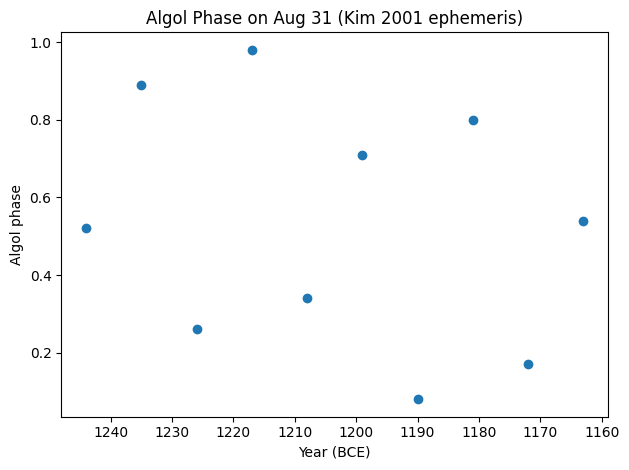

In [5]:
# Cell 5: visualize Algol phase on Aug 31 vs year (BCE)
# This plot helps see whether Aug 31 tends to fall near dim or bright phases.
plt.figure()
plt.scatter(df['Date (Aug 31, BCE)'], df['Phase'])
plt.gca().invert_xaxis()  # older dates to the left, newer to the right
plt.xlabel('Year (BCE)')
plt.ylabel('Algol phase')
plt.title('Algol Phase on Aug 31 (Kim 2001 ephemeris)')
plt.tight_layout()
plt.show()
